<a href="https://colab.research.google.com/github/geraldoaax/ciclo_detalhado_ml/blob/main/ciclo_detalhado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [6]:
ciclo_df = pd.read_excel('/content/ciclo_detalhado.xlsx')
ciclo_df.reset_index(drop = True, inplace = True)

In [7]:
ciclo_df

,Tag,CicloID,Ano,Mês,Dia,Hora Início,Hora Fim,Turno,Turma,Classificação,...,Descarga,Ciclo,Vel. Vazio KM/H,Vel. Cheio KM/H,Vel. Média KM/H,Fogo,Massa / Produção,Tipo Input,Obs,Ciclo Válido
0,CMB-1,CMB1-202305041210180000,2023,5,4,04/05/2023 11:45:44,04/05/2023 12:10:18,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:24:16,00:24:34,0.00,0.00,0.00,888,30,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
1,CMB-1,CMB1-202305041211490000,2023,5,4,04/05/2023 12:10:18,04/05/2023 12:11:49,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:21,00:01:31,0.00,0.00,0.00,888,30,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
2,CMB-1,CMB1-202305041337150000,2023,5,4,04/05/2023 12:11:49,04/05/2023 13:37:15,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:23,01:25:26,0.00,0.00,0.00,888,40,EMBARCADO,Alocado pelo Controle por arrastar e soltar,0
3,CMB-1,CMB1-202305041404140000,2023,5,4,04/05/2023 13:37:15,04/05/2023 14:04:14,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:27,00:26:59,0.00,0.00,0.00,CORRE,40,EMBARCADO,Alocado pela troca de atividade da maquina de ...,0
4,CMB-1,CMB1-202305041406290000,2023,5,4,04/05/2023 14:04:14,04/05/2023 14:06:29,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:26,00:02:15,0.00,0.00,0.00,CORRE,39,EMBARCADO,Alocado pela troca de atividade da maquina de ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,CM-1,CM1-202305181529300000,2023,5,18,18/05/2023 15:28:56,18/05/2023 15:29:30,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:06,00:00:34,0.51,0.00,0.24,NaN,40,EMBARCADO,Alocado pelo Controle,1
953,CMBA-2,CMBA2-202305181531100000,2023,5,18,17/05/2023 15:02:27,18/05/2023 15:31:10,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:14,00:28:43,2.14,0.00,0.00,0,40,EMBARCADO,Alocado pelo Controle,1
954,CMBA-2,CMBA2-202305181531470000,2023,5,18,18/05/2023 15:31:10,18/05/2023 15:31:47,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:08,00:00:37,0.00,0.00,0.00,0,40,EMBARCADO,Alocado pelo Controle,1
955,CMBA-2,CMBA2-202305181532590000,2023,5,18,18/05/2023 15:31:47,18/05/2023 15:32:59,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:11,00:01:12,0.54,2.46,1.48,0,40,EMBARCADO,Alocado pelo Controle,1


In [8]:
ciclo_df.head(10)

,Tag,CicloID,Ano,Mês,Dia,Hora Início,Hora Fim,Turno,Turma,Classificação,...,Descarga,Ciclo,Vel. Vazio KM/H,Vel. Cheio KM/H,Vel. Média KM/H,Fogo,Massa / Produção,Tipo Input,Obs,Ciclo Válido
0,CMB-1,CMB1-202305041210180000,2023,5,4,04/05/2023 11:45:44,04/05/2023 12:10:18,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:24:16,00:24:34,0.0,0.0,0.0,888,30,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
1,CMB-1,CMB1-202305041211490000,2023,5,4,04/05/2023 12:10:18,04/05/2023 12:11:49,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:21,00:01:31,0.0,0.0,0.0,888,30,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
2,CMB-1,CMB1-202305041337150000,2023,5,4,04/05/2023 12:11:49,04/05/2023 13:37:15,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:23,01:25:26,0.0,0.0,0.0,888,40,EMBARCADO,Alocado pelo Controle por arrastar e soltar,0
3,CMB-1,CMB1-202305041404140000,2023,5,4,04/05/2023 13:37:15,04/05/2023 14:04:14,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:27,00:26:59,0.0,0.0,0.0,CORRE,40,EMBARCADO,Alocado pela troca de atividade da maquina de ...,0
4,CMB-1,CMB1-202305041406290000,2023,5,4,04/05/2023 14:04:14,04/05/2023 14:06:29,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:26,00:02:15,0.0,0.0,0.0,CORRE,39,EMBARCADO,Alocado pela troca de atividade da maquina de ...,0
5,CMB-1,CMB1-202305041408380000,2023,5,4,04/05/2023 14:06:29,04/05/2023 14:08:38,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:18,00:02:09,0.0,0.0,0.0,888,50,EMBARCADO,Alocado pela troca de atividade da maquina de ...,1
6,CMB-1,CMB1-202305041411570000,2023,5,4,04/05/2023 14:08:38,04/05/2023 14:11:57,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:08,00:03:19,0.0,0.0,0.0,888,50,EMBARCADO,Alocado pela troca de atividade da maquina de ...,1
7,CMB-1,CMB1-202305041417470000,2023,5,4,04/05/2023 14:11:57,04/05/2023 14:17:47,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:04,00:05:50,0.0,0.0,0.0,888,30,EMBARCADO,Alocado pela troca de atividade da maquina de ...,0
8,CMB-1,CMB1-202305041421160000,2023,5,4,04/05/2023 14:17:47,04/05/2023 14:21:16,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:07,00:03:29,0.0,0.0,0.0,888,45,EMBARCADO,Alocado pela troca de atividade da maquina de ...,1
9,CMB-37,CMB37-202305051645490000,2023,5,5,05/05/2023 16:31:37,05/05/2023 16:45:49,TURNO 02 -2023,0,EQUIPAMENTO DE TRANSPORTE,...,00:00:28,00:14:12,0.0,0.0,0.0,0,40,EMBARCADO,Alocado pelo Controle,1


In [9]:
ciclo_df.tail(10)

,Tag,CicloID,Ano,Mês,Dia,Hora Início,Hora Fim,Turno,Turma,Classificação,...,Descarga,Ciclo,Vel. Vazio KM/H,Vel. Cheio KM/H,Vel. Média KM/H,Fogo,Massa / Produção,Tipo Input,Obs,Ciclo Válido
947,CMBA-2,CMBA2-202305171502270000,2023,5,17,17/05/2023 13:53:22,17/05/2023 15:02:27,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:01:04,01:09:05,0.01,5.14,0.06,0,40,EMBARCADO,Alocado pelo Controle,1
948,CMB-26,CMB26-202305171624090000,2023,5,17,17/05/2023 12:31:53,17/05/2023 16:24:09,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:05:01,03:52:16,0.37,0.85,0.70,NaN,40,EMBARCADO,Alocado pelo Controle,0
949,CM-1,CM1-202305181527320000,2023,5,18,16/05/2023 14:20:35,18/05/2023 15:27:32,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:11,05:40:01,0.00,0.45,0.00,NaN,40,EMBARCADO,Alocado pelo Controle,0
950,CM-1,CM1-202305181528100000,2023,5,18,18/05/2023 15:27:32,18/05/2023 15:28:10,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:08,00:00:38,3.60,2.70,3.26,NaN,40,EMBARCADO,Alocado pelo Controle,1
951,CM-1,CM1-202305181528560000,2023,5,18,18/05/2023 15:28:10,18/05/2023 15:28:56,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:16,00:00:46,1.08,0.00,0.64,NaN,40,EMBARCADO,Alocado pelo Controle,1
952,CM-1,CM1-202305181529300000,2023,5,18,18/05/2023 15:28:56,18/05/2023 15:29:30,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:06,00:00:34,0.51,0.00,0.24,NaN,40,EMBARCADO,Alocado pelo Controle,1
953,CMBA-2,CMBA2-202305181531100000,2023,5,18,17/05/2023 15:02:27,18/05/2023 15:31:10,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:14,00:28:43,2.14,0.00,0.00,0,40,EMBARCADO,Alocado pelo Controle,1
954,CMBA-2,CMBA2-202305181531470000,2023,5,18,18/05/2023 15:31:10,18/05/2023 15:31:47,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:08,00:00:37,0.00,0.00,0.00,0,40,EMBARCADO,Alocado pelo Controle,1
955,CMBA-2,CMBA2-202305181532590000,2023,5,18,18/05/2023 15:31:47,18/05/2023 15:32:59,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:11,00:01:12,0.54,2.46,1.48,0,40,EMBARCADO,Alocado pelo Controle,1
956,CMBA-2,CMBA2-202305181534560000,2023,5,18,18/05/2023 15:32:59,18/05/2023 15:34:56,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:23,00:01:57,3.03,0.00,1.09,0,40,EMBARCADO,Alocado pelo Controle,1


In [31]:
ciclo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tag                           957 non-null    object 
 1   CicloID                       957 non-null    object 
 2   Ano                           957 non-null    int64  
 3   Mês                           957 non-null    int64  
 4   Dia                           957 non-null    int64  
 5   Hora Início                   956 non-null    object 
 6   Hora Fim                      957 non-null    object 
 7   Turno                         957 non-null    object 
 8   Turma                         957 non-null    object 
 9   Classificação                 957 non-null    object 
 10  Frota                         957 non-null    object 
 11  Setor Designado               957 non-null    object 
 12  Operador                      957 non-null    object 
 13  Tag C

In [32]:
ciclo_df.describe()

,Ano,Mês,Dia,Densidade,Distância vazio (Metros),Distância cheio (Metros),Distância planejada (Metros),DMT. Ciclo (Metros),Distância Total (Metros),Dist. cheio por vazio,Vel. Vazio KM/H,Vel. Cheio KM/H,Vel. Média KM/H,Massa / Produção,Ciclo Válido
count,957.0,957.0,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,956.000000,957.000000,957.000000
mean,2023.0,5.0,13.894462,715.569154,1602.194357,1768.455590,1120.258098,1800.528213,3601.056426,1.099812,47.303469,36.727712,40.347960,35.652038,0.927900
std,0.0,0.0,2.030711,15640.700584,821.856079,711.695506,3186.936999,1651.022764,3302.045528,2.405893,18.083502,29.367339,15.411114,1.832165,0.258789
min,2023.0,5.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,2023.0,5.0,13.000000,0.000000,1814.000000,2050.000000,1000.000000,1932.000000,3864.000000,1.130000,54.420000,41.000000,46.370000,35.000000,1.000000
50%,2023.0,5.0,14.000000,0.000000,1814.000000,2050.000000,1000.000000,1932.000000,3864.000000,1.130000,54.420000,41.000000,46.370000,35.000000,1.000000
75%,2023.0,5.0,15.000000,0.000000,1814.000000,2050.000000,1000.000000,1932.000000,3864.000000,1.130000,54.420000,41.000000,46.370000,35.000000,1.000000
max,2023.0,5.0,18.000000,342314.000000,14562.000000,8193.000000,50000.000000,25000.000000,50000.000000,73.900000,88.950000,842.710000,52.740000,50.000000,1.000000


In [34]:
count_data = ciclo_df.groupby('Dia')['CicloID'].count().reset_index()


Text(0.5, 1.0, 'Count of CicloID by Dia')

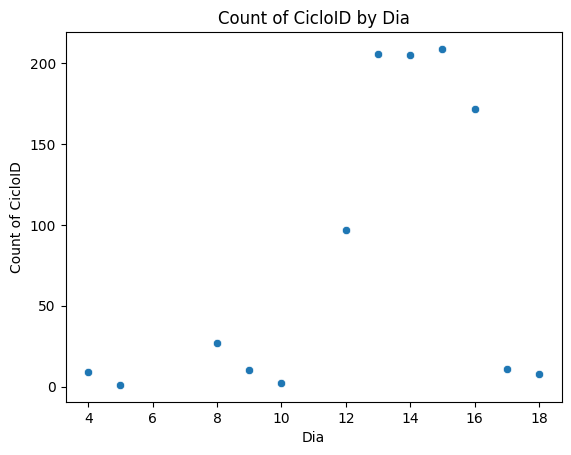

In [37]:
sns.scatterplot(x=count_data['Dia'], y=count_data['CicloID']);
plt.xlabel('Dia')
plt.ylabel('Count of CicloID')
plt.title('Count of CicloID by Dia')

In [38]:
X_train = count_data['Dia']
y_train = count_data['CicloID']

In [39]:
X_train

0      4
1      5
2      8
3      9
4     10
5     12
6     13
7     14
8     15
9     16
10    17
11    18
Name: Dia, dtype: int64

In [40]:
y_train


0       9
1       1
2      27
3      10
4       2
5      97
6     206
7     205
8     209
9     172
10     11
11      8
Name: CicloID, dtype: int64

In [41]:
X_train.shape


(12,)

In [42]:
y_train.shape


(12,)

# Construção do modelo sequencial

In [56]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 40, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 40)                80        
                                                                 
 dense_6 (Dense)             (None, 1)                 41        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')


In [58]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)


Epoch 1/1000
1/1 [==============================] - 1s 511ms/step - loss: 13508.7227
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 10591.9600
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 8222.2178
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 6607.1196
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 6351.4785
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 7359.1167
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 7618.4126
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 6945.3423
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 6315.0688
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 6342.3071
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 6827.0586
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 7056.8022
Epoch 1

In [59]:
epochs_hist.history.keys()

dict_keys(['loss'])

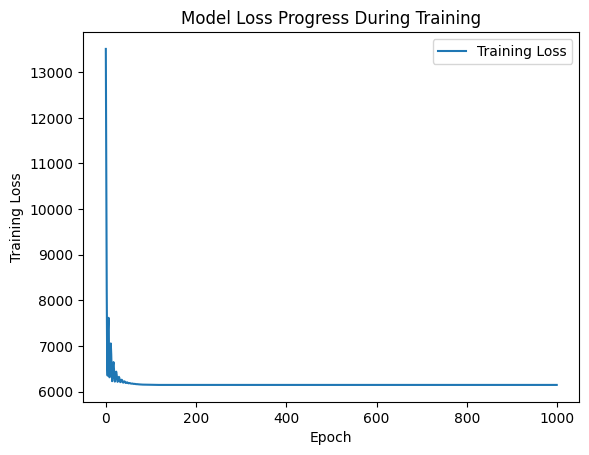

In [60]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [61]:
model.get_weights()

[array([[-0.00947827, -0.05183313, -0.8871135 ,  0.14176042,  0.61757636,
         -0.26187202, -0.29919246, -0.28664953,  0.9128912 , -0.05670471,
         -0.559245  ,  0.9524377 , -0.09464109, -0.04437542,  0.3138176 ,
         -0.22749905, -0.5389753 , -0.07633243, -0.10440739, -0.94348955,
         -0.08146148,  0.5076889 , -0.30586043,  0.00522807,  0.8973403 ,
          0.8993576 ,  0.12461665,  0.47406542,  0.2501632 ,  0.98459303,
          0.8519531 ,  0.6470429 , -0.4736836 ,  0.21948497,  0.09747785,
         -0.1978836 , -0.29457438,  0.8542324 , -0.3132637 , -0.494008  ]],
       dtype=float32),
 array([ 0.91309935,  1.889109  ,  0.84320766, -1.6113603 , -0.7151021 ,
        -1.1558068 , -1.9205104 , -1.930142  , -0.9340388 ,  0.5980604 ,
         0.8426423 , -0.8950072 , -1.7709304 , -0.07208207, -0.88295317,
        -2.2193975 ,  0.67210454,  0.0419844 , -1.0728415 ,  0.8497901 ,
        -1.6159445 , -1.3556027 , -1.4001759 , -1.0141963 , -0.9277236 ,
        -0.9367133